C:\Users\today\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\today\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

=== K-Nearest Neighbors (k=5) ===
Train Accuracy: 0.8146989835809226
Test Accuracy: 0.740625

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72       149
           1       0.76      0.75      0.76       171

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



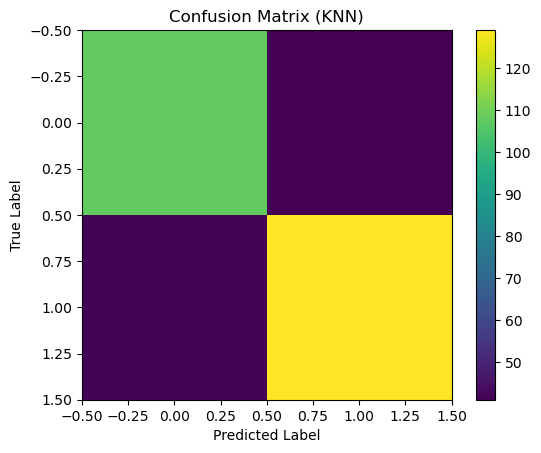

In [1]:
# K-Nearest Neighbors Classification on Wine Quality Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -----------------------------
# Load Dataset
# -----------------------------
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

# Convert quality to binary classification
# 1 = high quality (>= 6), 0 = low quality (< 6)
X = data.drop('quality', axis=1).values
y = (data['quality'] >= 6).astype(int)

# -----------------------------
# Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# Feature Scaling
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# KNN Model
# -----------------------------
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# -----------------------------
# Predictions
# -----------------------------
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

# -----------------------------
# Evaluation
# -----------------------------
print("=== K-Nearest Neighbors (k=5) ===")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# -----------------------------
# Confusion Matrix Visualization
# -----------------------------
cm = confusion_matrix(y_test, y_test_pred)

plt.imshow(cm)
plt.title("Confusion Matrix (KNN)")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Summary & Discussion

#We applied **K-Nearest Neighbors (KNN)** to classify wines as low or high quality based on physicochemical features. KNN is a non-parametric algorithm that assigns labels based on the majority class among the nearest neighbors in feature space.

#**Key Points:**
#- Feature scaling was critical since KNN relies on distance calculations.
#- The model achieved reasonable classification accuracy with \( k = 5 \).
#- KNN makes no assumptions about the underlying data distribution.

#**Limitations:**
#- Performance depends heavily on the choice of \( k \).
#- Computational cost increases with dataset size.
#- Sensitive to noisy features and irrelevant dimensions.

#**Potential Improvements:**
#- Tune \( k \) using cross-validation.
#- Apply dimensionality reduction (e.g., PCA).
#- Weight neighbors by distance.

#**Conclusion:**
#KNN provides an intuitive and flexible classification approach and serves as a strong baseline for understanding instance-based learning.
